# EquiHealth: Improve Access to Healthcare for Marginalized Communities<b>
    
<hr>

This notebook contains four parts.

<b>Part 1 - Importing Necessary Libraries and Dataset

<b>Part 2 - Data Cleaning

<b>Part 3 - Visualizations

<b>Part 4 - Findings
    
<b>Part 5 - Solutions and Recommendations

<hr>
    
## IMPORTING NECESSARY LIBRARIES AND DATASET
    Importing libraries needed in the analysis

In [2]:
import pandas as pd
import matplotlib .pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

    Uploading, reading, and displaying the .csv file

In [3]:
df = pd.read_csv('datasets/NYC_Patient Demographics2017.csv')
display(df)

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,YES,NO,NO,NO,NO,NO,132
1,2017,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,UNKNOWN,146
2,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,131
3,2017,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,YES,NO,NO,NO,NO,112
4,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,NO,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187187,2017,RESIDENTIAL,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,...,NO,NO,YES,YES,NO,NO,NO,NO,NO,142
187188,2017,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,...,NO,NO,YES,YES,YES,NO,NO,NO,YES,142
187189,2017,EMERGENCY,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,...,NO,NO,YES,YES,NO,NO,NO,NO,YES,888
187190,2017,RESIDENTIAL,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,104


    The dataset consists of patient data specifically from New York City Hospitals in the year 2017.

## DATA CLEANING

    Delete the unnecessary columns first.

In [4]:
df2 = pd.DataFrame(df)
df2.drop(['Survey Year',
         'Veteran Status',
         'Number Of Hours Worked Each Week',
         'Special Education Services',
         'Mental Illness',
         'Intellectual Disability',
         'Autism Spectrum',
         'Other Developmental Disability',
         'Alcohol Related Disorder',
         'Drug Substance Disorder',
         'Mobility Impairment Disorder',
         'Hearing Visual Impairment',
         'Hyperlipidemia',
         'High Blood Pressure',
         'Diabetes',
         'Obesity',
         'Heart Attack',
         'Stroke',
         'Other Cardiac',
         'Pulmonary Asthma',
         'Alzheimer or Dementia',
         'Kidney Disease',
         'Liver Disease',
         'Endocrine Condition',
         'Neurological Condition',
         'Traumatic Brain Injury',
         'Joint Disease',
         'Cancer',
         'Other Chronic Med Condition',
         'No Chronic Med Condition',
         'Unknown Chronic Med Condition',
         'Smokes',
         'Received Smoking Medication',
         'Received Smoking Counseling',
         'Serious Mental Illness',
         'Principal Diagnosis Class',
         'Additional Diagnosis Class',
         'SSI Cash Assistance',
         'SSDI Cash Assistance',
         'Veterans Disability Benefits',
         'Veterans Cash Assistance',
         'Public Assistance Cash Program',
         'Other Cash Benefits',
         'Criminal Justice Status',
         'Three Digit Residence Zip Code'],axis = 1, inplace = True)
display(df2)

,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,...,Education Status,Medicaid and Medicare Insurance,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance
0,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
1,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,UNKNOWN,YES,NO,NO,NO
2,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,NO,NO,NO,NO,NO
3,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,NO,YES,NO,NO,NO
4,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,SOME COLLEGE,NO,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187187,RESIDENTIAL,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
187188,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,YES,YES,NO,NO,NO
187189,EMERGENCY,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
187190,RESIDENTIAL,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,NO,NO,NO,NO,NO


In [34]:
df2.fillna(0, inplace = True)
display(df2)

,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,...,Education Status,Medicaid and Medicare Insurance,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance
0,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
1,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,UNKNOWN,YES,NO,NO,NO
2,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,NO,NO,NO,NO,NO
3,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,NO,YES,NO,NO,NO
4,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,SOME COLLEGE,NO,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187187,RESIDENTIAL,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
187188,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,YES,YES,NO,NO,NO
187189,EMERGENCY,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
187190,RESIDENTIAL,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,NO,NO,NO,NO,NO


    The code fills any missing values in the DataFrame df2 with 0, ensuring that the dataset is complete and ready for analysis.

## VISUALIZATIONS

    With the dataset now cleaned, we can proceed to visualize the data. The visualizations showcase the distribution of relevant variables.

NEW YORK CITY REGION    93938
WESTERN REGION          31364
HUDSON RIVER REGION     27823
CENTRAL NY REGION       20190
LONG ISLAND REGION      13877
Name: Region Served, dtype: int64

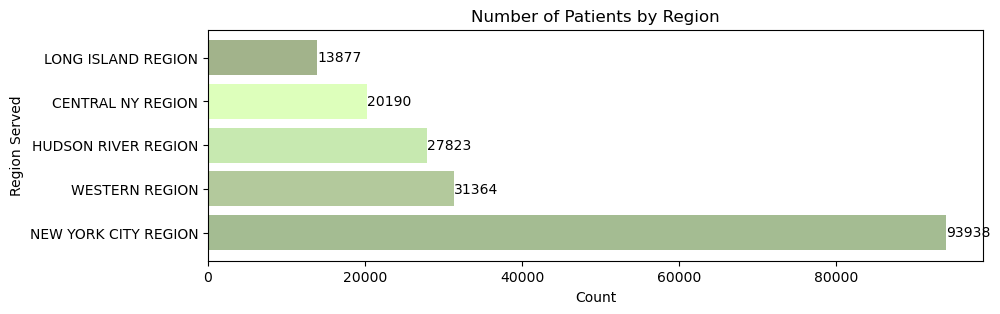

In [4]:
region_counts = df2['Region Served'].value_counts()
c = ['#A4BC92','#B3C99C','#C7E9B0','#DDFFBB','#A2B38B']

plt.figure(figsize=(10, 3))
plt.barh(region_counts.index, region_counts.values, color=c)
plt.xlabel('Count')
plt.ylabel('Region Served')
plt.title('Number of Patients by Region')
plt.xticks(rotation=0)

for i, v in enumerate(region_counts.values):
    plt.text(v, i, str(v), ha='left', va='center')

display(region_counts)
plt.show()

    The graph shows the number of instances for each region, indicating the level of demand for healthcare services. While New York City Region has the highest number of instances, suggesting high demand, other regions such as Long Island, Central NY, Hudson River, and Western have relatively lower numbers, indicating potential areas for improvement in accessibility and healthcare service utilization.

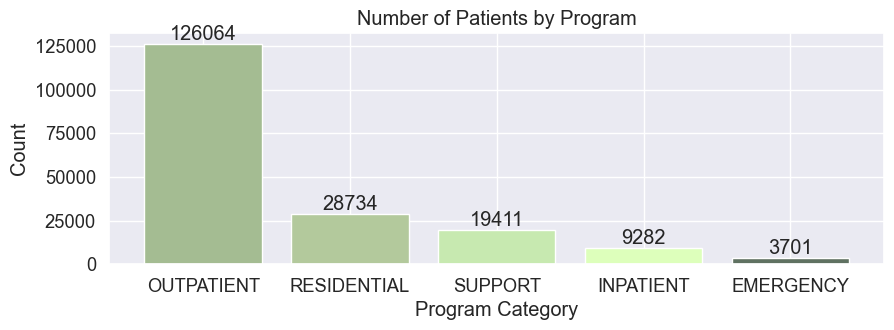

In [88]:
program_counts = df2['Program Category'].value_counts()
c = ['#A4BC92','#B3C99C','#C7E9B0','#DDFFBB','#5F7161']


plt.figure(figsize=(10,3))
plt.bar(program_counts.index,program_counts.values, color=c)
plt.xlabel('Program Category')
plt.ylabel('Count')
plt.title('Number of Patients by Program')
plt.xticks(rotation = 0)

for i, v in enumerate(program_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

    The distribution of program categories in the dataset provides insights into the utilization of healthcare services. Outpatient care has the highest number of instances, indicating its widespread utilization. This suggests that many individuals seek healthcare through outpatient services, which may include regular check-ups, consultations, and minor treatments. Residential, Support, Inpatient, and Emergency care have relatively lower numbers, indicating areas where accessibility or awareness can be improved.

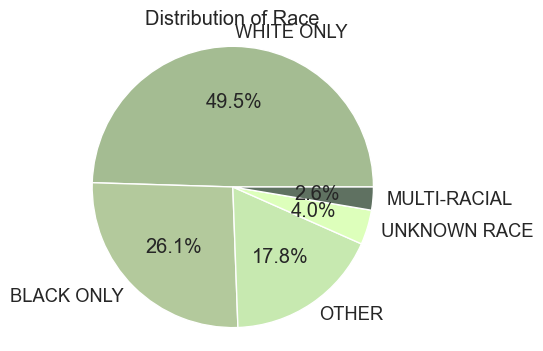

In [103]:
race_counts = df['Race']
c = ['#A4BC92','#B3C99C','#C7E9B0','#DDFFBB','#5F7161']

plt.figure(figsize=(4,4))

frequency_table = df2['Race'].value_counts()
percentage_table = frequency_table / frequency_table.sum() * 100

percentage_table = percentage_table.round(2)
percentage_table = percentage_table.reset_index()
percentage_table.columns = ['Race','Percentage']

labels = percentage_table['Race']
sizes = percentage_table['Percentage']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = c)
plt.axis('equal')
plt.title('Distribution of Race')

plt.show()

    The pie chart illustrates the distribution of race in the dataset, providing insights into the racial diversity of the patients. It shows that the majority (49.5%) identify as White Only, followed by Black Only (26.1%), Multi-Racial (2.6%), Unknown Race (4.0%), and Other (17.8%). Analyzing the racial composition is important for addressing healthcare disparities and ensuring equitable access to services for all racial groups.

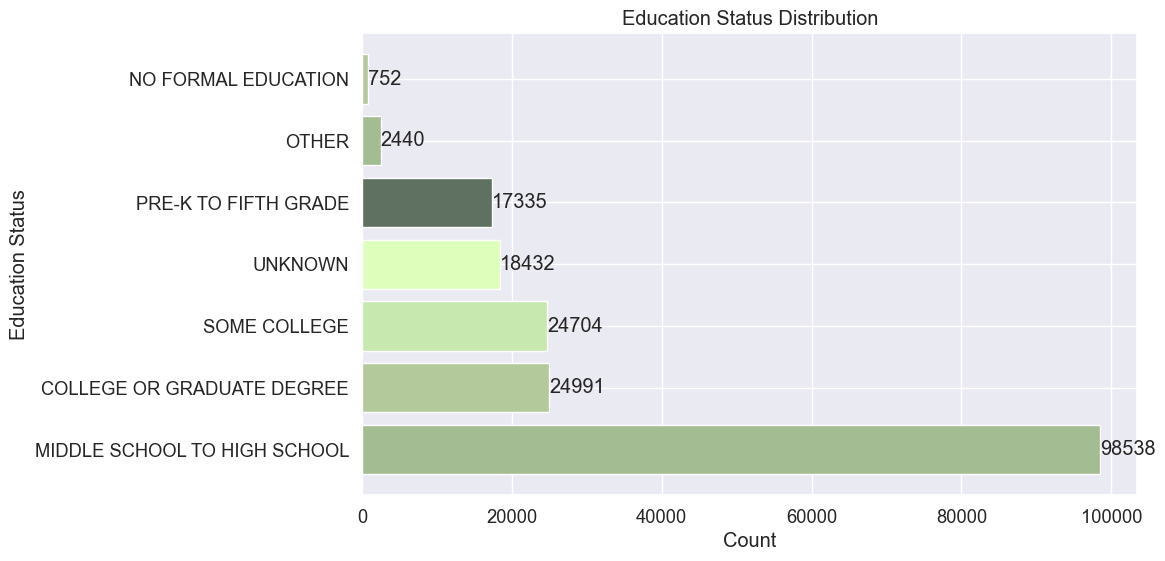

In [104]:
educations_counts = df2['Education Status'].value_counts()
c = ['#A4BC92','#B3C99C','#C7E9B0','#DDFFBB','#5F7161']

plt.figure(figsize=(10, 6))
plt.barh(educations_counts.index, educations_counts.values, color = c)
plt.xlabel('Count')
plt.ylabel('Education Status')
plt.title('Education Status Distribution')
plt.xticks(rotation=0)

for i, v in enumerate(educations_counts.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.show()

    The graph depicts the distribution of education status among the patients in the dataset. It provides insights into the educational backgrounds of the individuals accessing healthcare services. The data shows that the highest number of patients have completed Middle School to High School (98,538), followed by College or Graduate Degree (24,991) and Some College (24,704). Pre-K to Fifth Grade (17,335) and Unknown (18,432) education statuses also have notable representation.

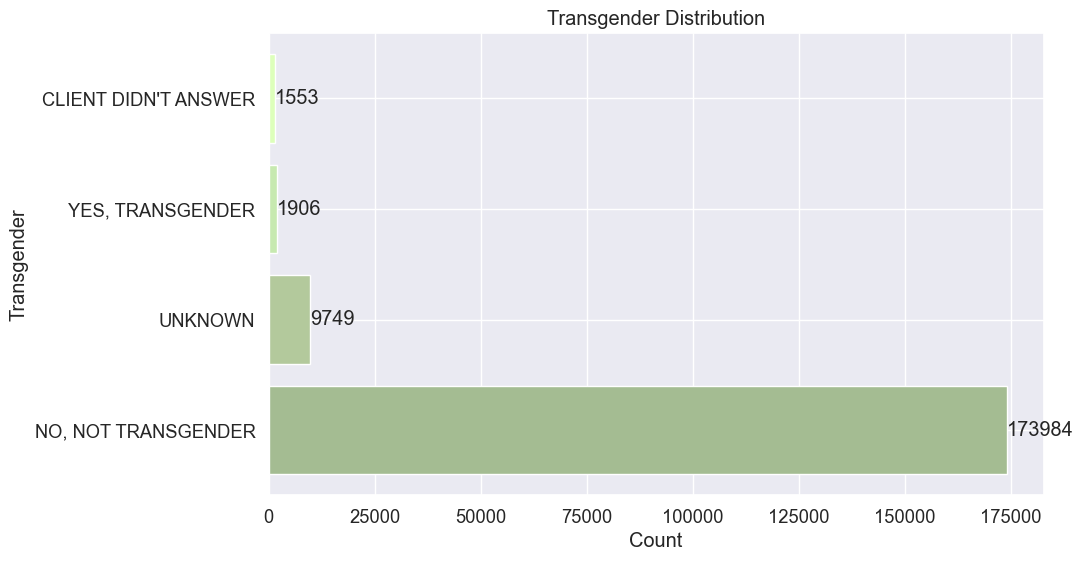

In [105]:
transgender_counts = df2['Transgender'].value_counts()
c = ['#A4BC92','#B3C99C','#C7E9B0','#DDFFBB','#5F7161']

plt.figure(figsize=(10, 6))
plt.barh(transgender_counts.index, transgender_counts.values, color = c)
plt.xlabel('Count')
plt.ylabel('Transgender')
plt.title('Transgender Distribution')
plt.xticks(rotation=0)

for i, v in enumerate(transgender_counts.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.show()

    The graph displays the distribution of transgender individuals in the dataset. It indicates that a portion of patients chose not to answer or had an unknown transgender status, while a significant number identified as transgender. The majority of patients indicated that they are not transgender. This information emphasizes the need for inclusive and culturally sensitive healthcare for individuals of all gender identities.
    

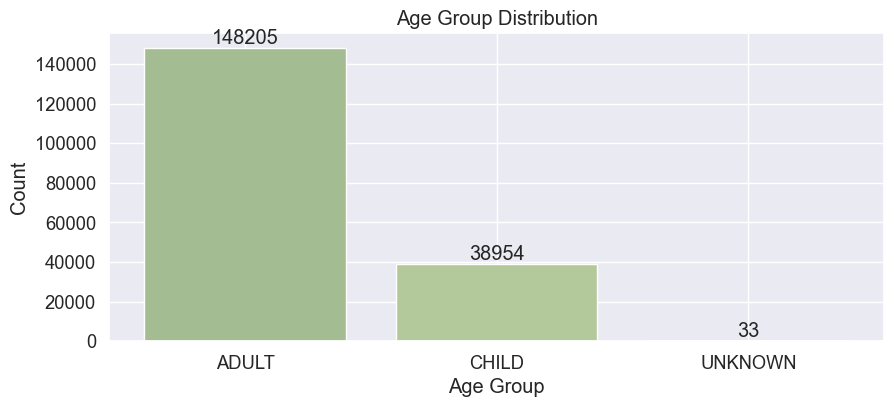

In [106]:
agegroup_counts = df2['Age Group'].value_counts()
c = ['#A4BC92','#B3C99C','#C7E9B0','#DDFFBB','#5F7161']

plt.figure(figsize=(10,4))
plt.bar(agegroup_counts.index,agegroup_counts.values, color = c)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.xticks(rotation = 0)

for i, v in enumerate(agegroup_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

    The graph represents the distribution of patients across different age groups. The majority of patients fall into the "Adult" category, indicating a higher number of adults seeking healthcare services. There is also a significant number of patients categorized as "Child." Only a small number of patients have an unknown age group. Understanding the distribution of patients across age groups is crucial for developing age-specific healthcare interventions and addressing the unique healthcare needs of different age cohorts.

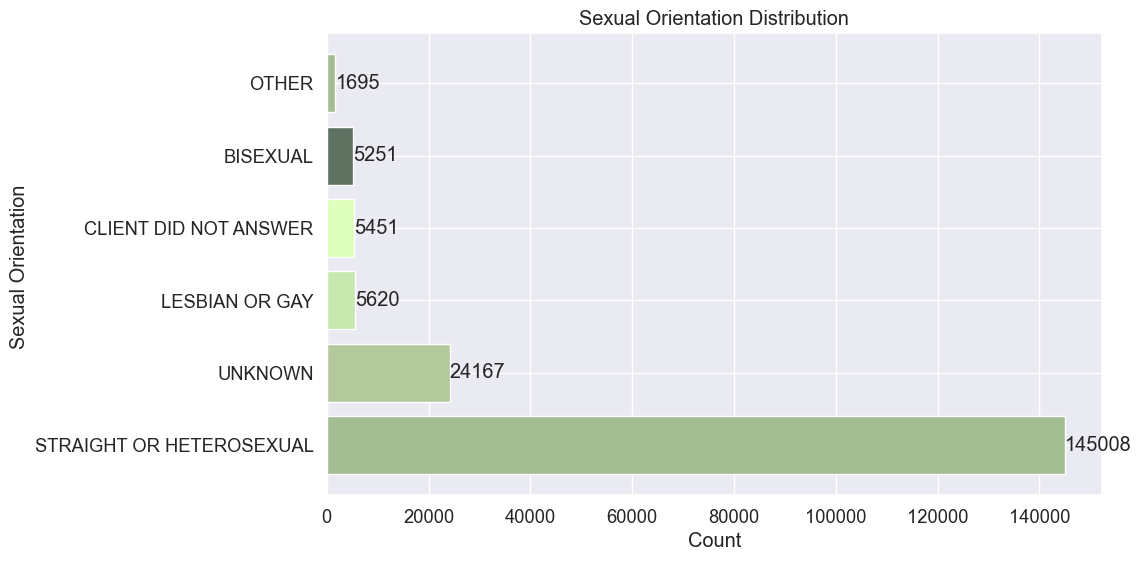

In [107]:
sexualo_counts = df2['Sexual Orientation'].value_counts()
c = ['#A4BC92','#B3C99C','#C7E9B0','#DDFFBB','#5F7161']

plt.figure(figsize=(10, 6))
plt.barh(sexualo_counts.index, sexualo_counts.values, color = c)
plt.xlabel('Count')
plt.ylabel('Sexual Orientation ')
plt.title('Sexual Orientation Distribution')
plt.xticks(rotation=0)

for i, v in enumerate(sexualo_counts.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.show()

    The graph displays the distribution of patients' sexual orientations. The majority of patients identify as "Straight or Heterosexual" indicating a predominant sexual orientation among the population.

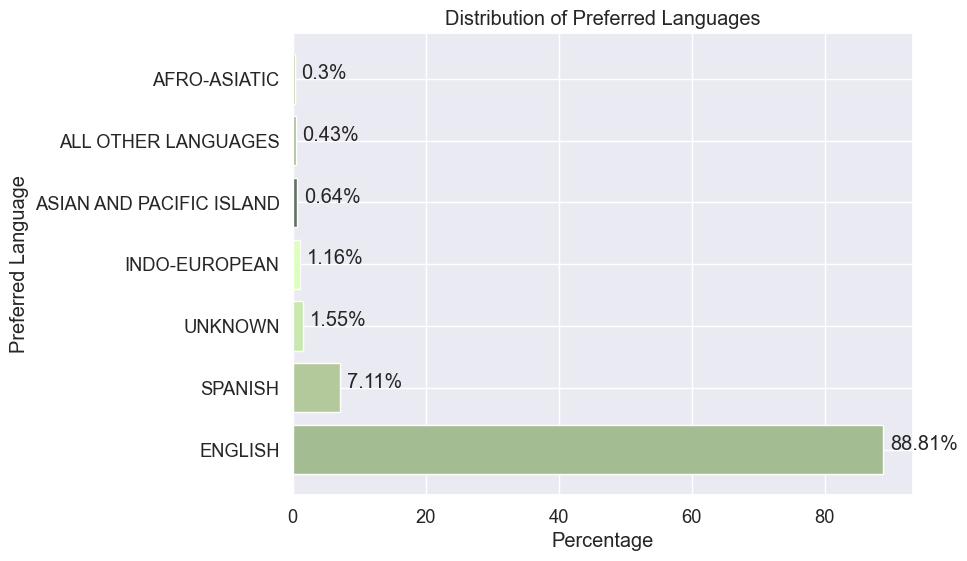

In [108]:
c = ['#A4BC92','#B3C99C','#C7E9B0','#DDFFBB','#5F7161']

frequency_table = df['Preferred Language'].value_counts()
percentage_table = frequency_table / frequency_table.sum() * 100
percentage_table = percentage_table.round(2)

percentage_table = percentage_table.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(percentage_table.index, percentage_table.values, color=c)

plt.xlabel('Percentage')
plt.ylabel('Preferred Language')
plt.title('Distribution of Preferred Languages')

for i, v in enumerate(percentage_table.values):
    plt.text(v + 1, i, str(v) + '%')

plt.show()

    The graph illustrates the distribution of preferred languages among the dataset. The majority of individuals, approximately 88.81%, prefer to communicate in English. Spanish is the second most common preferred language, accounting for 7.11% of the dataset. Indo-European languages make up 1.16% of the preferences, while Asian and Pacific Island languages represent 0.64%. Additionally, all other languages account for 0.43%, Afro-Asiatic languages for 0.3%, and the remaining 1.55% of individuals have an unknown preferred language.

Region Served,CENTRAL NY REGION,HUDSON RIVER REGION,LONG ISLAND REGION,NEW YORK CITY REGION,WESTERN REGION
Program Category,,,,,
EMERGENCY,0.100784,0.126723,0.078087,0.504458,0.189949
INPATIENT,0.138009,0.242943,0.102564,0.409718,0.106766
OUTPATIENT,0.107207,0.137002,0.063825,0.521568,0.170398
RESIDENTIAL,0.056762,0.116795,0.091808,0.602666,0.131969
SUPPORT,0.174643,0.230385,0.100562,0.267889,0.226521


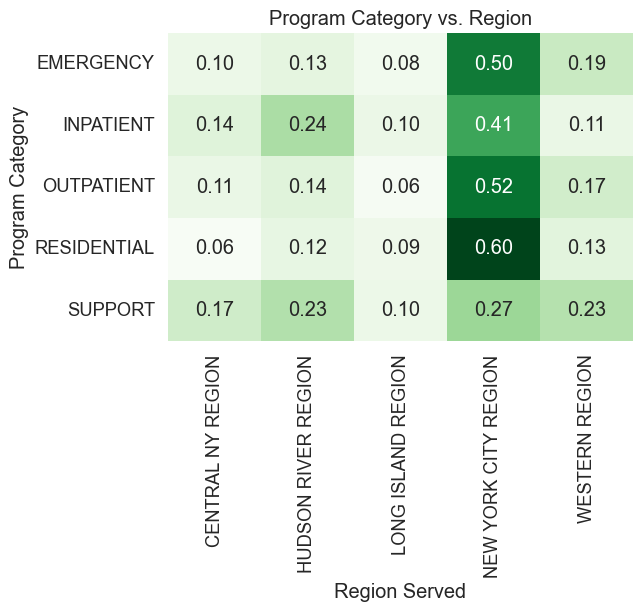

In [9]:
contingency_table = pd.crosstab(df['Program Category'], df['Region Served'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

num_rows = contingency_table.shape[0]
num_cols = contingency_table.shape[1]
min_dim = min(num_rows, num_cols)
cramer_v = np.sqrt(chi2 / (df.shape[0] * (min_dim - 1)))

contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)


plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(contingency_table_norm, annot=True, cmap='Greens', fmt=".2f", cbar=False)
plt.title("Program Category vs. Region")
plt.xlabel("Region Served")
plt.ylabel("Program Category")

display(contingency_table_norm)
plt.show()

    Regarding emergency healthcare services, the data shows that the "NEW YORK CITY REGION" has a significantly higher proportion compared to other regions, with a value of 0.504. This suggests that the demand for emergency services is particularly concentrated in the New York City area.

    In "HUDSON RIVER REGION",  the inpatient services stands out with the proportion of 0.242. This indicates that this region mostly accommodate inpatient services.
    
    For outpatient services, the data shows that the "NEW YORK CITY REGION" has the highest proportion with a value of 0.522. This suggests a higher prevalence or utilization of outpatient healthcare services, such as clinics or medical centers, in this region.

    In the "Residential" program category, the data highlights the dominance of the "NEW YORK CITY REGION" with the highest proportion of 0.603 This implies that this region has a greater prevalence of residential healthcare services or facilities, which cater to long-term care or assisted living needs.
    
    In terms of the "Support" program category, both the "HUDSON RIVER REGION" and the "WESTERN REGION" exhibit relatively higher proportions with values of 0.230 and 0.227, respectively. This suggests a greater emphasis on providing support services, such as counseling, therapy, or community-based programs, in these regions.
    
    These findings suggest that healthcare organizations and policymakers should consider the unique needs and demands of each region when planning and allocating resources for different program categories to ensure adequate and appropriate healthcare services are available across all regions.

,Age Group,Hispanic Ethnicity,Transgender,Sexual Orientation,Race,Preferred Language
Age Group,1.000000,0.072750,0.082507,0.186745,0.083469,0.047974
Hispanic Ethnicity,0.072750,1.000000,0.158519,0.148190,0.481530,0.366551
Transgender,0.082507,0.158519,1.000000,0.390744,0.129707,0.060242
Sexual Orientation,0.186745,0.148190,0.390744,1.000000,0.101205,0.071740
Race,0.083469,0.481530,0.129707,0.101205,1.000000,0.207689
Preferred Language,0.047974,0.366551,0.060242,0.071740,0.207689,1.000000


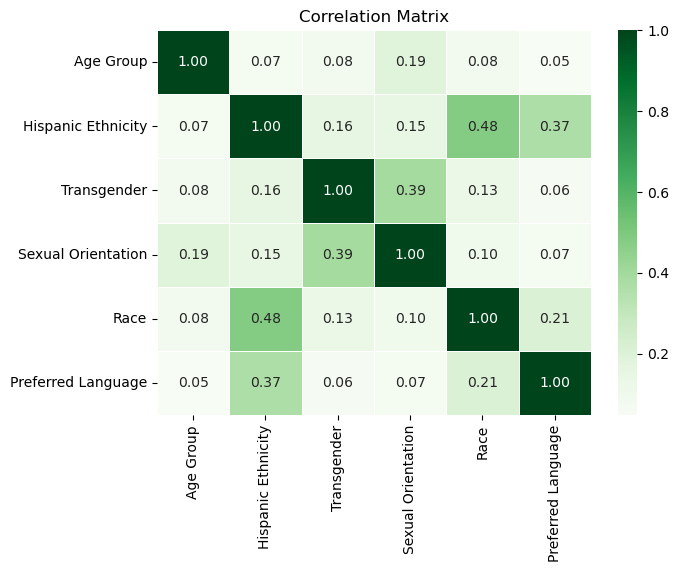

In [6]:
columns_corr = ['Age Group', 'Hispanic Ethnicity', 'Transgender', 'Sexual Orientation', 'Race', 'Preferred Language']

subset_df = df2[columns_corr]
corr_matrix = pd.DataFrame(index=columns_corr, columns=columns_corr)

for col1 in columns_corr:
    for col2 in columns_corr:
        contingency_table = pd.crosstab(subset_df[col1], subset_df[col2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        num_rows = contingency_table.shape[0]
        num_cols = contingency_table.shape[1]
        cramer_v = np.sqrt(chi2 / (subset_df.shape[0] * min(num_rows - 1, num_cols - 1)))
        corr_matrix.loc[col1, col2] = cramer_v

corr_matrix = corr_matrix.astype(float)

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

display(corr_matrix)

plt.show()



## FINDINGS

* Age Group: The correlations with other factors are relatively weak. There is a slight positive correlation with Hispanic Ethnicity, Transgender, Sexual Orientation, and Race. This suggests that age group may have some influence on healthcare access, but other factors have stronger correlations. 
<br>
* Hispanic Ethnicity: There is a moderate positive correlation with Race and Education Status. This suggests that being of Hispanic ethnicity may have some impact on healthcare access, potentially due to cultural and socioeconomic factors associated with this group.
<br>
* Transgender: There is a moderate positive correlation with Sexual Orientation, indicating that being transgender may be associated with specific challenges or barriers to healthcare access within the context of sexual orientation.
<br>
* Sexual Orientation: There is a moderate positive correlation with Transgender, suggesting that individuals with diverse sexual orientations may face unique healthcare access concerns related to their gender identity.
<br>
* Race: There is a moderate positive correlation with Hispanic Ethnicity, indicating that racial identity, particularly being Hispanic, may influence healthcare access. This aligns with existing research on racial disparities in healthcare.
<br>
<b> The analysis of the data reveals several key findings. First, there is a variation in healthcare access and utilization among different demographic groups. Factors such as age, sex, race, sexual orientation, and preferred language play a role in shaping healthcare experiences. Additionally, regional disparities exist, with different program categories and patient populations varying across regions. Furthermore, there are areas of underrepresented or unknown data, indicating a need for more comprehensive data collection.<b>

## SOLUTIONS AND RECOMMENDATIONS

* Prioritize cultural competence and language diversity by offering interpretation services and multilingual healthcare materials.
<br>

* Create safe and inclusive spaces for patients of all sexual orientations through training healthcare professionals and promoting inclusive policies.
<br>

* Address regional disparities by allocating resources, services, and programs equitably across different regions.
<br>

* Enhance data collection and analysis systems to capture comprehensive demographic information.
<br>

* Implement targeted strategies to improve healthcare access for marginalized communities based on age, sex, race, sexual orientation, and preferred language.